## School Enrollment Metric 
Oddly enough, we discovered that majority of Pokemon Go players are adults. With that in mind, we decided to factor in the  number of children in an area as a criteria. In order to do so, we used school enrollment data by neighborhood to determine which neighborhood had the lowest number of children. The lower the amount of children, the better in this metric.

To start, we read through the dataset and created a dataframe. 

In [24]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas 

data = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")
pd.DataFrame(data)

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
...,...,...,...
501,Wilkinsburg Borough,Other,72
502,Windgap,Other,50
503,Windgap,PITTSBURGH WESTWOOD K-5,29
504,Windgap,PITTSBURGH BRASHEAR HIGH SCHOOL,19


We noticed that this dataset includes multiple schools within the same neighborhood. We wanted to condense the data in order to only show one row per neighborhood and have the total number of children per neighborhood be shown as the final value.

In [25]:
condense=data.groupby('neighborhood').sum()
pd.DataFrame(condense)

,enrolled_students
neighborhood,
Allegheny Center,84
Allentown,289
Arlington,186
Arlington Heights,27
Banksville,180
...,...
West End,28
West Oakland,54
Westwood,269


Condensing the data made it a lot easier to work with. But even in this state, there were still many rows that were significantly outside the range we were going for. To narrow down the results, all neighborhoods with over 50 enrolled students were discarded 

In [26]:
query_mask = condense['enrolled_students']< 50
small_schools = condense[query_mask]
pd.DataFrame(small_schools)

,enrolled_students
neighborhood,
Arlington Heights,27
Bluff,49
Central Oakland,16
Chartiers City,35
East Carnegie,27
Esplen,26
Golden Triangle,18
Hays,40
North Oakland,11


This left us with the top 15 neighborhoods to play Pokemon Go in. We then plotted the data in order to get better visualization.

Text(0, 0.5, 'Number of students')

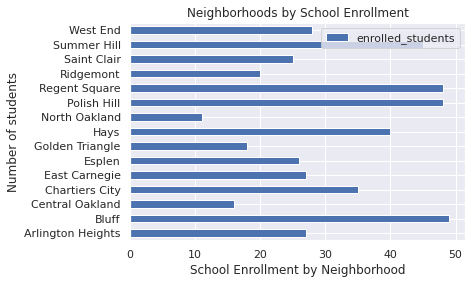

In [27]:
sns.set()
small_schools.plot.barh()
plt.title('Neighborhoods by School Enrollment')
plt.xlabel('School Enrollment by Neighborhood')
plt.ylabel('Number of students')



I then took the top five neighborhoods and displayed it in a pie chart. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87e23dd850>],
      dtype=object)

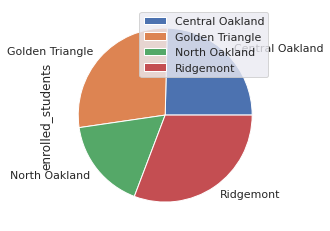

In [29]:
query_mask = condense['enrolled_students']< 25
top_five = condense[query_mask]
pd.DataFrame(top_five)
top_five.plot.pie(subplots=True)

### Conclusion 

North Oakland won the gold in a close competition for best neighborhood to play Pokemon Go in according to my metric. North Oakland only has 11 children enrolled in school. Considering that Oakland is primarially a college town, this makes  a lot of sense. 